# **Predicting Exam Performance by Various Factors**

In [1]:
# libraries needed in this proposal

library(repr)
library(tidyverse)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

## **Introduction**

#### **Relevant background information on the topic**

The dataset is obtained in the study “The development of intuitive knowledge classifier and the modeling of domain dependent data” done by H. Tolga Kahraman et. al. (2013) on a web based learning system. The system tracks dynamic data which represent the student’s educational interactions such as visited pages and elapsed time in the concept/goal pages. This dynamic data is used to generate the variables to describe the students and are used to classify users' knowledge.

#### **The Question we will try to answer with our project**

Based on four factors, the degree of study time for material (STG), repetition number for material (SCG), study time for related objects like prerequisites (STR), and exam performance for related objects (LPR), the exam performance for material (PEG), predicting the knowledge level (UNS) and finding a factor that has the strongest relationship with PEG.

#### **The dataset description that will be used to answer the question**

We have two csv files, a training dataset and a testing dataset. The columns in this datasets are STG (the degree of study time for material, a quantitative variable), SCG (The degree of repetition number of user for goal object materials, a quantitative variable), STR (The degree of study time of user for related objects with goal object, a quantitative variable), LPR (The exam performance of user for related objects with goal object, a quantitative variable), PEG (the exam performance for material, a quantitative variable), and UNS (The knowledge level of user, a categorical variable). The training dataset has 258 rows excluding column names and the testing dataset has 145 rows excluding column names.

## **Preliminary exploratory data analysis**

#### **Reading data from the web**

In [2]:
# download data from our group's remote repository

url <- "https://raw.githubusercontent.com/stankur/dsci-100-project/main/Data_User_Modeling_Dataset_Hamdi%20Tolga%20KAHRAMAN.csv"

data <- read_csv(url)

data <- data |> 
        select(STG:UNS)

data

New names:
• `` -> `...7`
• `` -> `...8`
Rows: 258 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): UNS, Attribute Information:
dbl (5): STG, SCG, STR, LPR, PEG
lgl (2): ...7, ...8

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.00,0.00,0.00,0.00,0.00,very_low
0.08,0.08,0.10,0.24,0.90,High
0.06,0.06,0.05,0.25,0.33,Low
⋮,⋮,⋮,⋮,⋮,⋮
0.54,0.82,0.71,0.29,0.77,High
0.50,0.75,0.81,0.61,0.26,Middle
0.66,0.90,0.76,0.87,0.74,High


#### **Summarization of the data (exploratory data analysis)**

In [19]:
summarization <- data |>
                mutate(STG_mean = mean(STG), ) |>
                select(STG_mean) |>
                slice(1)

#summarization


# mean
mean_data <- data |>
                mutate(STG = mean(STG),  
                       SCG = mean(SCG), 
                       STR = mean(STR),
                       LPR = mean(LPR),
                       PEG = mean(PEG)) |>
                select(STG, SCG, STR, LPR, PEG) |>
                head(1)

# na?
na <- data |> 
            mutate(STG = is.na(STG), SCG = is.na(SCG), 
                   STR = is.na(STR), LPR = is.na(LPR), 
                   PEG = is.na(PEG), UNS = is.na(UNS)) |>
            select(STG, SCG, STR, LPR, PEG, UNS) |>
            head(1)


#UNS summary
uns_grouped_by_level <- group_by(data, UNS) |>
                        summarize(count = n())



mean_tidy <- mean_data |>
        pivot_longer(cols = STG:PEG,
                    names_to = "Feature", values_to = "Mean") 


na_tidy <- na |>
        pivot_longer(na, cols = STG:UNS,
                    names_to = "Feature", values_to = "NA")


Warning message in gsub(vec_paste0("^", names_prefix), "", cols):
“argument 'pattern' has length > 1 and only the first element will be used”


In [20]:
tidy <- data.frame("Feature" = c("STG", "SCG", "STR", "LPR", "PEG", "UNS"),
                   "Mean" = c(0.3711473, 0.3556744, 0.4680039, 0.4327132, 0.4585388, "NA"),
                   "Is.NA" = c(FALSE, FALSE, FALSE, FALSE, FALSE, FALSE)) |>
        as_tibble(tidy)

tidy
uns_grouped_by_level

Feature,Mean,Is.NA
<chr>,<chr>,<lgl>
STG,0.3711473,FALSE
SCG,0.3556744,FALSE
STR,0.4680039,FALSE
LPR,0.4327132,FALSE
PEG,0.4585388,FALSE
UNS,NA,FALSE


UNS,count
<chr>,<int>
High,63
Low,83
Middle,88
very_low,24


#### **Visualization of the data**

The following histogram shows the distribution of the values of each variable in the datasat.

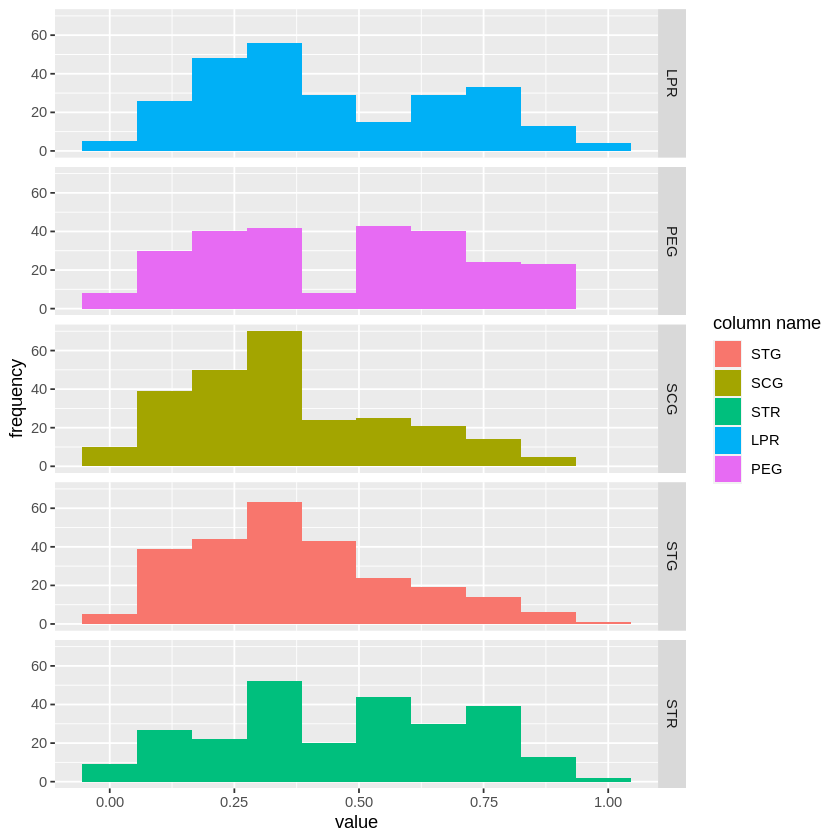

In [21]:
histogrammable_data <- data |>
                        select(STG:PEG)

histogrammable_data_pivoted <- pivot_longer(histogrammable_data, 
                                           cols= STG:PEG,
                                           names_to = "column_name",
                                           values_to ="value")

quantitative_plot <- ggplot(histogrammable_data_pivoted, aes(x = value, fill = as_factor(column_name))) +
        geom_histogram(bins = 10) +
        facet_grid(rows = vars(column_name)) +
        labs(fill = "column name", x = "value", y = "frequency")

quantitative_plot

The following bar chart shows the distribution of frequencies across different UNS (knowledge level) 

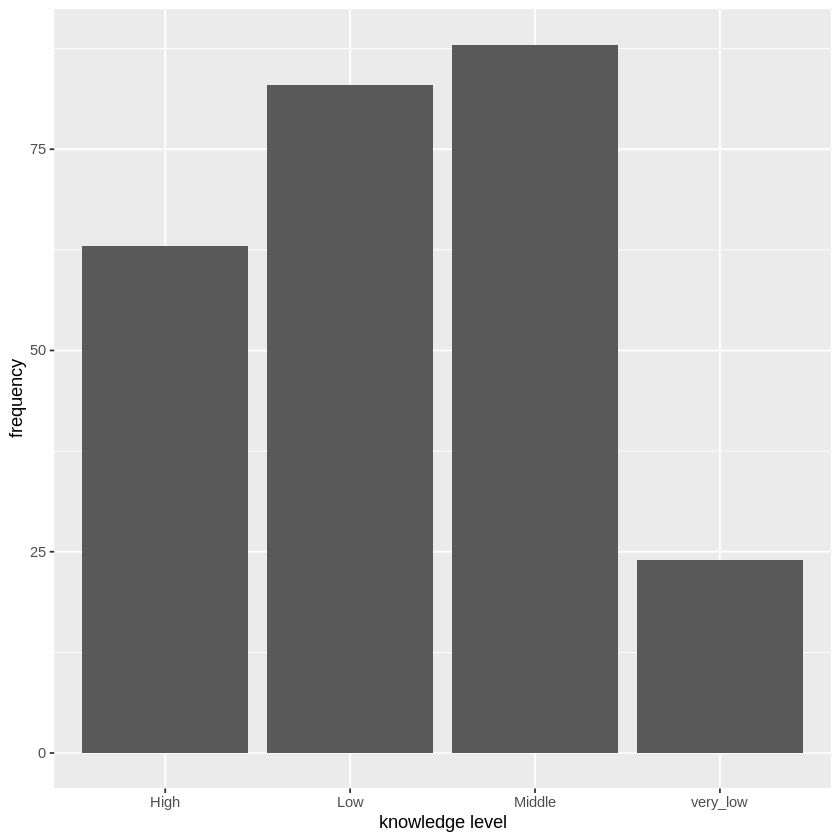

In [16]:
uns_bar <- ggplot(uns_grouped_by_level, aes(x=UNS, y=count)) + geom_bar(stat="identity") + labs(x="knowledge level", y="frequency")
uns_bar

## **Methods**

#### **Explaination how we will conduct either our data analysis and which variables/columns we will use**

First, we find the pairwise correlation of the variables and exclude the variables which are highly correlated. Then, we use the relevant and filtered columns to predict UNS by applying k-nearest neighbors. We will also try to use linear regression on STG, STR, LPR, and LPR to predict PEG and find which variable has the strongest effect on PEG.

#### **Describe at least one way that you will visualize the results**

Using a function ggpairs we would be able to compare the pairwise variables.
We could make a scatterplot.

## **Expected outcomes and significance**

#### **What do you expect to find?**

We think that the columns are relevant in influencing the user knowledge and hence we predict that the accuracy of the model that predicts user knowledge level will have a relatively high accuracy level. We also expect that the repetition number for the material will have the highest influence on exam performance.

#### **What impact could such findings have?**

We could suggest a study habit to students based on the results. For example, if there is a high relationship between LPR and PEG, we could recommend studying more about basic subject in the field.

#### **What future questions could this lead to?**

How to improve the web learning system to accommodate a better growth of knowledge among the users and which metrics (repetition or study time) of which materials (goal materials, or related materials) to focus on improving.


## **Reference**

Kahraman, H. T., Sagiroglu, S., & Colak, I. (2013). The development of intuitive knowledge classifier and the modeling of domain dependent data. Knowledge-Based Systems, 37, 283-295. https://doi.org/10.1016/j.knosys.2012.08.009
